In [86]:
# módulos
import pandas as pd
import pm4py

In [87]:
# iniciamos carregando o log de eventos
# como estamos carregando um arquivo .csv, devemos indicar o separador das colunas <"sep=';'">
event_log_csv = pd.read_csv("C:\\Process Mining\\grupo-2\\Bases_de_Dados\\running-example_3.csv", sep=';') 

num_events = len(event_log_csv) # numero de eventos (fases que a pessoa vai passar)
num_cases = len(event_log_csv.case_id.unique()) # numero de casos (numero de pessoas)

print(f"Number of events: {num_events}\nNumber of cases: {num_cases}")

Number of events: 42
Number of cases: 6


In [88]:
event_log_csv

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen
3,3,decide,2011-01-06 09:18:00+01:00,200,Sara
4,3,reinitiate request,2011-01-06 12:18:00+01:00,200,Sara
5,3,examine thoroughly,2011-01-06 13:06:00+01:00,400,Sean
6,3,check ticket,2011-01-08 11:43:00+01:00,100,Pete
7,3,decide,2011-01-09 09:55:00+01:00,200,Sara
8,3,pay compensation,2011-01-15 10:45:00+01:00,200,Ellen
9,2,register request,2010-12-30 11:32:00+01:00,50,Mike


In [89]:
# para ler um arquivo .csv devemos utilizar o formato dataframe
event_log_1 = pm4py.format_dataframe(event_log_csv, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
# ^transforma a tabela de dados de eventos em um formato que pode ser usado por qualquer algoritmo de mineração de processos em pm4py
# ^cria uma cópia do log de eventos de entrada e renomeia as colunas atribuídas para nomes de colunas padronizados usados ​​em pm4py

start_activities = pm4py.get_start_activities(event_log_1) # pega as atividades que ocorrem primeiro no log de eventos
end_activities = pm4py.get_end_activities(event_log_1) # pega as atividades que ocorrem por último no log de eventos

print(f"Start activities: {start_activities}\nEnd activities: {end_activities}")

event_log_1

Start activities: {'register request': 6}
End activities: {'reject request': 3, 'pay compensation': 3}


,case_id,activity,timestamp,costs,resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,1,register request,2010-12-30 10:02:00+00:00,50,Pete,1,register request,2010-12-30 10:02:00+00:00,0,0
1,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,1,examine thoroughly,2010-12-31 09:06:00+00:00,1,0
2,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,1,check ticket,2011-01-05 14:12:00+00:00,2,0
3,1,decide,2011-01-06 10:18:00+00:00,200,Sara,1,decide,2011-01-06 10:18:00+00:00,3,0
4,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,1,reject request,2011-01-07 13:24:00+00:00,4,0
5,2,register request,2010-12-30 10:32:00+00:00,50,Mike,2,register request,2010-12-30 10:32:00+00:00,5,1
6,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,2,check ticket,2010-12-30 11:12:00+00:00,6,1
7,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,2,examine casually,2010-12-30 13:16:00+00:00,7,1
8,2,decide,2011-01-05 10:22:00+00:00,200,Sara,2,decide,2011-01-05 10:22:00+00:00,8,1
9,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,2,pay compensation,2011-01-08 11:05:00+00:00,9,1


In [90]:
# lendo um arquivo no formato .xes
event_log_xes = pm4py.read_xes("C:\\Process Mining\\grupo-2\\Bases_de_Dados\\running-example.xes")

start_activities = pm4py.get_start_activities(event_log_1) # pega as atividades que ocorrem primeiro no log de eventos
end_activities = pm4py.get_end_activities(event_log_1) # pega as atividades que ocorrem por último no log de eventos

print(f"Start activities: {start_activities}\nEnd activities: {end_activities}")

parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1523.54it/s]

Start activities: {'register request': 6}
End activities: {'reject request': 3, 'pay compensation': 3}


In [91]:
# em um arquivo .xes podemos ler os dados utilizando o pm4py
event_log = pm4py.read_xes("C:\\Process Mining\\grupo-2\\Bases_de_Dados\\running-example.xes")

start_activities = pm4py.get_start_activities(event_log) # atividades iniciais
end_activities = pm4py.get_end_activities(event_log) #atividades finais

print("Start activities: {start_activities}\nEnd activities: {end_activities}")

parsing log, completed traces :: 100%|██████████| 6/6 [00:00<?, ?it/s]

Start activities: {start_activities}
End activities: {end_activities}


In [92]:
# podemos gerar um arquivo .csv com os dados copiados de um arquivo .xes
event_log = pm4py.read_xes('C:\\Process Mining\\grupo-2\\Bases_de_Dados\\running-example.xes') # arquivo XES que será exportado
df = pm4py.convert_to_dataframe(event_log) # convertendo as informações lidas para um quadro de dados
df.to_csv('C:\\Process Mining\\grupo-2\\Bases_de_Dados\\running-example_covert.csv') # arquivo CSV que vai receber a importação 


parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 824.81it/s]


In [93]:
# teste fazendo listas
listaAtividades = list(event_log_csv.activity)
listaPessoas = list(event_log_csv.case_id)
listaHoras = list(event_log_csv.timestamp)

print(listaPessoas)
print(listaHoras)
print(listaAtividades)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4]
[Timestamp('2010-12-30 13:32:00+0000', tz='UTC'), Timestamp('2010-12-30 14:06:00+0000', tz='UTC'), Timestamp('2010-12-30 15:34:00+0000', tz='UTC'), Timestamp('2011-01-06 08:18:00+0000', tz='UTC'), Timestamp('2011-01-06 11:18:00+0000', tz='UTC'), Timestamp('2011-01-06 12:06:00+0000', tz='UTC'), Timestamp('2011-01-08 10:43:00+0000', tz='UTC'), Timestamp('2011-01-09 08:55:00+0000', tz='UTC'), Timestamp('2011-01-15 09:45:00+0000', tz='UTC'), Timestamp('2010-12-30 10:32:00+0000', tz='UTC'), Timestamp('2010-12-30 11:12:00+0000', tz='UTC'), Timestamp('2010-12-30 13:16:00+0000', tz='UTC'), Timestamp('2011-01-05 10:22:00+0000', tz='UTC'), Timestamp('2011-01-08 11:05:00+0000', tz='UTC'), Timestamp('2010-12-30 10:02:00+0000', tz='UTC'), Timestamp('2010-12-31 09:06:00+0000', tz='UTC'), Timestamp('2011-01-05 14:12:00+0000', tz='UTC'), Timestamp('2011-01-06 10:18:00+0000', t

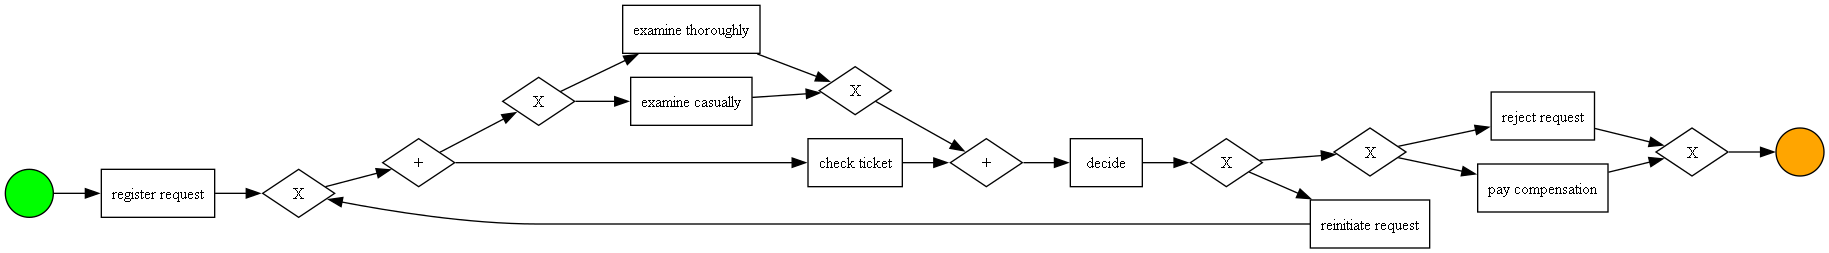

In [94]:
# Gráficos do pm4py - 1
process_tree = pm4py.discover_process_tree_inductive(event_log_1) 
# essa função descobre de forma indutiva o tipo de processamento de dados

# as notações suportadas pelo pm4py são: bmpn, árvores de processo e redes de petri
bpmn_model = pm4py.convert_to_bpmn(process_tree) # aqui o processo está sendo convertido para o modelo bpmn
pm4py.view_bpmn(bpmn_model)

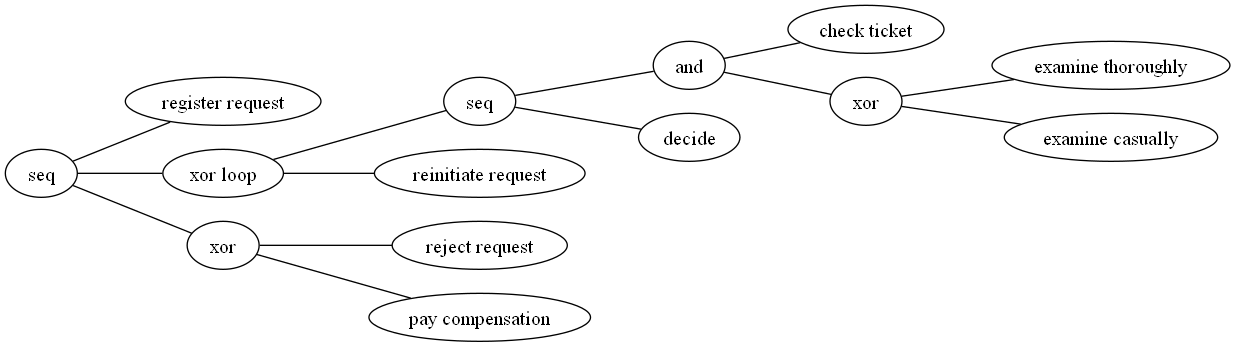

In [95]:
# Gráficos do pm4py - 2
process_tree = pm4py.discover_process_tree_inductive(event_log_1)
pm4py.view_process_tree(process_tree)

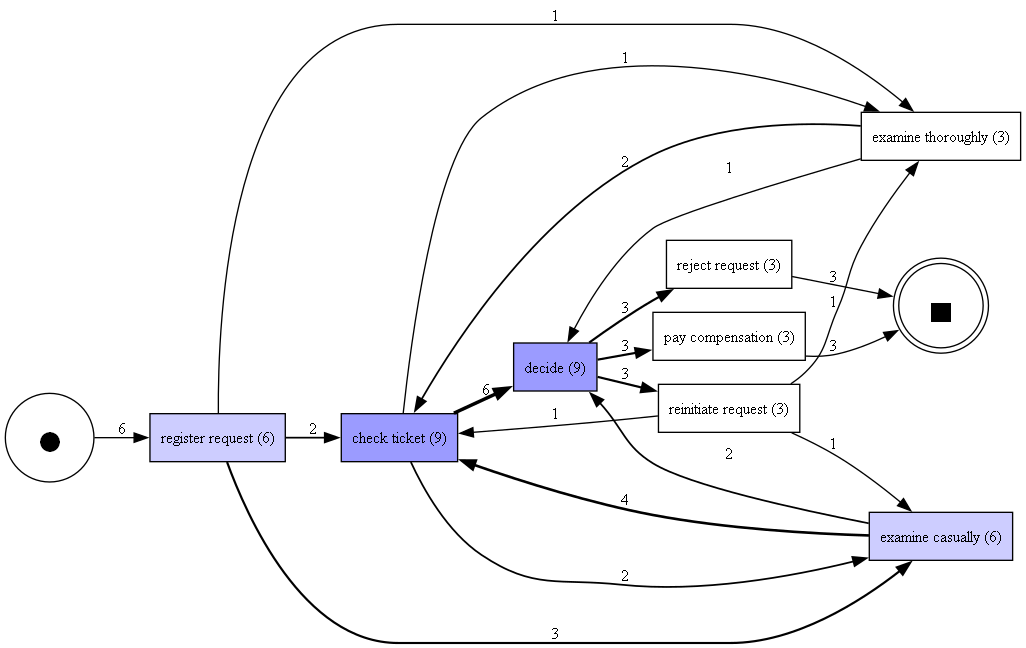

In [96]:
# Gráficos do pm4py - 3
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log_1)
pm4py.view_dfg(dfg, start_activities, end_activities)

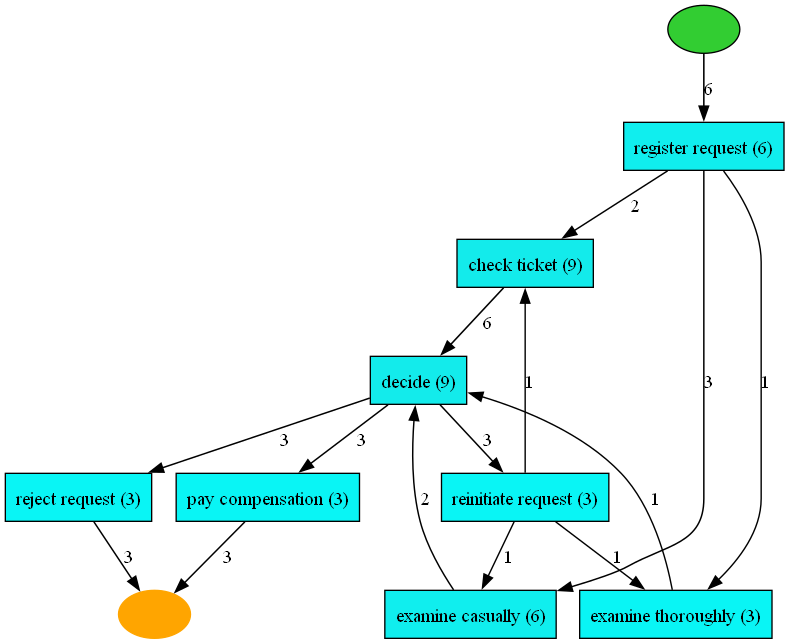

In [97]:
# Gráficos do pm4py - 4
map = pm4py.discover_heuristics_net(event_log_1)
pm4py.view_heuristics_net(map)

In [98]:
# analise de conformidade, função <.conformance_declare>
log = pm4py.read_xes("C:\\Process Mining\\grupo-2\\Bases_de_Dados\\running-example.xes")
declare_model = pm4py.discover_declare(log)
conf_result = pm4py.conformance_declare(log, declare_model)
conf_result
# tipo do retorno: List[Dict[str, Any]]
# percorre os casos, e retorna uma lista de dicionários
# cada dicionario é relacionado a um caso
# dev_fitness é o quanto o log está parecido com o "padrão", 1.0 significa que está igual


parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1794.74it/s]


[{'no_constr_total': 29,
  'deviations': [],
  'no_dev_total': 0,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'no_constr_total': 29,
  'deviations': [],
  'no_dev_total': 0,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'no_constr_total': 29,
  'deviations': [['altresponse', ('register request', 'check ticket')],
   ['altresponse', ('register request', 'decide')]],
  'no_dev_total': 2,
  'dev_fitness': 0.9310344827586207,
  'is_fit': False},
 {'no_constr_total': 29,
  'deviations': [],
  'no_dev_total': 0,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'no_constr_total': 29,
  'deviations': [['altresponse', ('register request', 'check ticket')],
   ['altresponse', ('register request', 'decide')]],
  'no_dev_total': 2,
  'dev_fitness': 0.9310344827586207,
  'is_fit': False},
 {'no_constr_total': 29,
  'deviations': [],
  'no_dev_total': 0,
  'dev_fitness': 1.0,
  'is_fit': True}]

In [99]:
# analise de conformidade, função <.conformance_temporal_profile>
# criando uma cópia do log alterado
event_log_alt = pd.read_csv("C:\\Process Mining\\grupo-2\\Bases_de_Dados\\exemplo-modificado.csv")

# iniciando a verificação
temporal_profile = pm4py.discover_temporal_profile(event_log_alt, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
conformance_temporal_profile = pm4py.conformance_temporal_profile(event_log_1, temporal_profile, zeta=1, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
conformance_temporal_profile
# analisa a conformidade do tempo de ocorrencia das atividades
# tipo do retorno List[List[Tuple[float, float, float, float]]]

Exception: the dataframe should (at least) contain a column for the case identifier, a column for the activity and a column for the timestamp.

In [ ]:
# Importar rede petri do yasper no python.
# abrindo o arquivo da yasper no python. 
import xml.etree.ElementTree as ET

# Caminho para o arquivo EPNML
path_epnml = "C:\\Process Mining\\grupo-2\\Bases_de_Dados\\running-example-model-convertido.pnml"

# Carregar o arquivo EPNML
tree = ET.parse(path_epnml)
root = tree.getroot()

# Modificar o tipo para PNML
namespace_pnml = "http://www.pnml.org/version-2009/grammar/pnmlcoremodel"

for elem in root.iter():
    if '}' in elem.tag:
        elem.tag = elem.tag.split('}', 1)[1]  # remove o namespace atual
        elem.set('xmlns', namespace_pnml)  # define o novo namespace

# Salvar o arquivo modificado como PNML
caminho_pnml_convertido = "arquivo_convertido.pnml"
tree.write(caminho_pnml_convertido, encoding="UTF-8", xml_declaration=True)

C:\Users\betsabenogueira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pm4py\objects\petri_net\importer\variants\pnml.py:354: UserWarning: the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking
  warnings.warn("the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking")


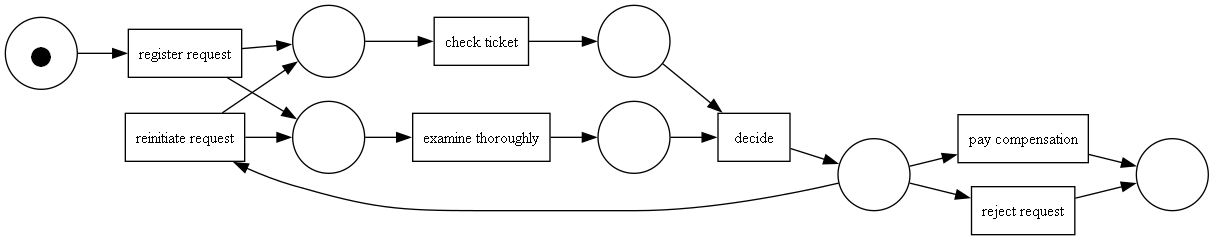

In [101]:
path = "C:\\Process Mining\\grupo-2\\Bases_de_Dados\\running-example-model-convertido.pnml"
pn3, im3, fm3 = pm4py.read_pnml(path)
pm4py.view_petri_net(pn3,im3,fm3)

In [102]:
# lendo o arquivo .pnml

# log_yasper, start, end = pm4py.read_pnml("C:\\Process Mining\\grupo-2\\Bases_de_Dados\\running-example-model-convertido.pnml")
ativ_inicial = pm4py.get_start_activities(pn3, im3, fm3)
ativ_final = pm4py.get_end_activities(pn3, im3, fm3) 

print(f"Start activities: {start_activities}\nEnd activities: {end_activities}")

TypeError: 'PetriNet' object is not iterable

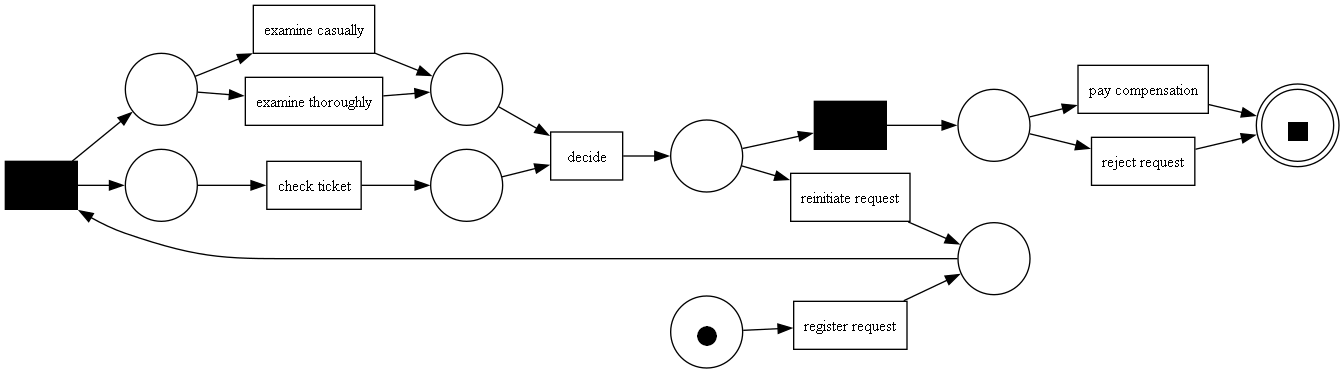

replaying log with TBR, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1309.36it/s]


{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [127]:
3 # Rede petri (a cada enter ela muda)
dataframe = pm4py.format_dataframe(pd.read_csv('C:\\Process Mining\\grupo-2\\Bases_de_Dados\\running-example_3.csv', sep=';'), case_id='case_id', activity_key='activity', timestamp_key='timestamp')
pn, ini, fim = pm4py.discover_petri_net_inductive(dataframe)
df_problems = pm4py.format_dataframe(pd.read_csv("C:\\Process Mining\\grupo-2\\Bases_de_Dados\\exemplo-modificado.csv", sep=';'), case_id='case_id', activity_key='activity', timestamp_key='timestamp')

pm4py.view_petri_net(pn,ini,fim)

conformance = pm4py.fitness_token_based_replay(dataframe, pn, ini, fim)
conformance

In [141]:
# exportar uma rede de petri para o yasper
import pm4py
from pm4py.objects.petri_net.importer import importer as pmnl_importer
from pm4py.objects.petri_net import exporter as pnml_exporter
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from IPython.display import Image

#pn ini fim é a base rea
pnml_exporter.exporter.apply(pn, ini, "C:\\Users\\betsabenogueira\\grupo-2-1\\Bases_de_Dados\\teste.pnml")


In [142]:
import xml.etree.ElementTree as ET

#Caminho para o arquivo EPNML
path_epnml = "C:\\Users\\betsabenogueira\\Documents\\arquivos de conformidade\\redepetritoyaspe2.pnml"

#Carregar o arquivo EPNML
tree = ET.parse(path_epnml)
root = tree.getroot()

#Modificar o tipo para PNML
namespace_pnml = "http://www.pnml.org/version-2009/grammar/pnmlcoremodel"

for elem in root.iter():
    if '}' in elem.tag:
        elem.tag = elem.tag.split('}', 1)[1]  # remove o namespace atual
        elem.set('xmlns', namespace_pnml)  # define o novo namespace

# Salvar o arquivo modificado como PNML
caminho_pnml_convertido = "arquivo_convertido.pnml"
tree.write(caminho_pnml_convertido, encoding="UTF-8", xml_declaration=True)

In [123]:
#pn ini fim é a base rea
pnml_exporter.exporter.apply(caminho_pnml_convertido, 'C:\\Users\\betsabenogueira\\Documents\\arquivos de conformidade\\redepetritoyaspe.pnml')

TypeError: apply() missing 1 required positional argument: 'output_filename'

In [139]:
# analise de conformidade do original com a rede petri alterada
rede, inicial, final = pmnl_importer.apply("C:\\Users\\betsabenogueira\\Documents\\arquivos de conformidade\\redepetritoyaspe5.pnml")
conformance2 = pm4py.fitness_token_based_replay(dataframe, pn, ini, fim)
# graf = pn_visualizer.apply(rede, inicial, final)
# imagem = pn_visualizer.view(graf)
conformance2

replaying log with TBR, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 2482.82it/s]


{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [ ]:
''' TAREFAS:
1- exportar rede de petri para o yasper 
2 - no yasper mudar o arquivo (para fazer a analise de conformidade)
3 - importar arquivo mudado e transformar rm uma rede de petri 
4 - fazer a conformidade do arquivo original com o arquivo mudado (que sera usado como padrão para medir a conformidade)'''